In [1]:
import pandas as pd
import numpy as np
import pyLDAvis
import matplotlib.pyplot as plt

# Anti Vaccine

## Number of Topics

In [8]:
Number = [	2, 	3, 	4,	5,	6,	7,	8,	9,	10]
LB_LogLikelihood = [	-61197582.18,	-60732388.13,	-60761767.45,	-60637079.6,	-60608204.49,	-60552307.73,	-60524313.8,	-60560971.64,	-60559452.61]
UB_Perplexity =[	6.378049449,	6.32956664,	6.332628571,	6.319633527,	6.316624145,	6.310798551,	6.307881006,	6.311701509,	6.311543195]

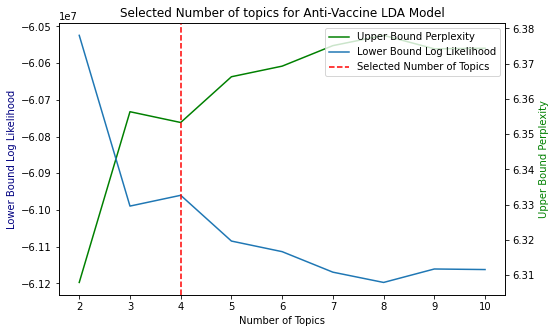

In [10]:
fig, ax = plt.subplots(figsize = (8, 5))
ax1 = ax.twinx()
l1, = ax.plot(Number, LB_LogLikelihood, label='Upper Bound Perplexity ', color='green')
l2, = ax1.plot(Number, UB_Perplexity, label='Lower Bound Log Likelihood')
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Lower Bound Log Likelihood')
ax.yaxis.label.set_color('navy')
ax1.yaxis.label.set_color('green')
ax1.set_ylabel('Upper Bound Perplexity')

l3 = ax1.axvline(x=4, color='red', linestyle='--', label='Selected Number of Topics')
plt.title('Selected Number of topics for Anti-Vaccine LDA Model')
plt.legend(handles=[l1, l2, l3],loc='best')
plt.savefig('../../Visualizations/RQ2/A_num_topics.pdf', dpi=600)

## PyLDAvis

In [63]:
import ast
with open('../../Files/models/topics/a_4_vocab_2.txt', 'r') as file:
    vocab = file.read().splitlines()

In [64]:
with open('../../Files/models/topics/a_4_tf_2.txt', 'r') as file:
    TF = file.read().splitlines()

In [65]:
df = pd.read_pickle('../../Files/models/topics/term_topics_a_4_2.pkl')
df2 = pd.read_pickle('../../Files/models/topics/doctop_a_4_distr_2.pickle')

In [66]:
docLen = pd.read_pickle('../../Files/models/topics/doclen_a_4_2.pkl')
doclen = docLen['doc_len']
df2['len'] = doclen

In [67]:
df2['sum'] = df2[['topic_0', 'topic_1', 'topic_2', 'topic_3']].sum(axis=1)
df5 = df2[df2['sum'] == 1]
df3 = df5[['topic_0', 'topic_1', 'topic_2',  'topic_3']]
doc_len = df5['len']

In [68]:
topic_term = df.to_numpy()
doc_topic = df3.to_numpy()

In [69]:
topic_term.shape

(4, 5000)

In [70]:
doc_topic.shape

(288539, 4)

In [19]:
len(vocab)

5000

In [20]:
Anti_top = pyLDAvis.prepare(topic_term, doc_topic,  doc_len,vocab, TF )

/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

In [21]:
pyLDAvis.display(Anti_top)

## Get Topic Descriptions

In [21]:
word_id = list(df.columns.values)
topic_1 = df.iloc[[0]]
topic_1 = df.iloc[[0]]
ord_vocab = [vocab[i] for i in word_id]
topic_1 = topic_1.transpose()
topic_1['word'] = ord_vocab
top_words = list(topic_1.sort_values(by=[0], ascending=False)[0:30]['word'])

## Subcluster Differences

In [71]:
a_sr = df2[['subreddit', 'topic_0', 'topic_1', 'topic_2', 'topic_3']].groupby('subreddit').mean()

In [72]:
with open('../../Files/Submissions/score/done/subcluster.txt', 'r') as f:
    subcluster = f.read().splitlines()

In [73]:
subcluster

['DebateVaccines',
 'CovidVaccineInjury',
 'VaccineDiscussion',
 'AncientTruehistory',
 'conspiracyNOPOL',
 'TopMindsOfReddit',
 'NoNewNormal',
 'TakeTheJab',
 'NoLockdownsNoMasks',
 'VACCINES',
 'conspiracyhub',
 'ConspiracyUltra',
 'altnewz',
 'NoNoNewNormal',
 'NoNewNormalBan',
 'noagenda',
 'antivax',
 'conspiracies',
 'CovidVaccinated',
 'CovidIsACult',
 'vacci_nation',
 'conspiracy',
 'TrueAntiVaccination']

In [74]:
a_sr_s = a_sr[a_sr.index.isin(subcluster)]

In [75]:
a_sr_s

,topic_0,topic_1,topic_2,topic_3
subreddit,,,,
ConspiracyUltra,0.774820,0.091855,0.063580,0.069744
CovidIsACult,0.713935,0.232115,0.026938,0.027012
CovidVaccinated,0.656095,0.208984,0.092952,0.041969
CovidVaccineInjury,0.790117,0.103618,0.046937,0.059328
DebateVaccines,0.774868,0.111471,0.068491,0.045170
NoLockdownsNoMasks,0.787549,0.110214,0.043402,0.058835
NoNewNormal,0.485343,0.337882,0.108899,0.067876
NoNewNormalBan,0.397849,0.416843,0.123715,0.061593
NoNoNewNormal,0.437409,0.348078,0.119538,0.094975


In [76]:
import matplotlib.pyplot as plt

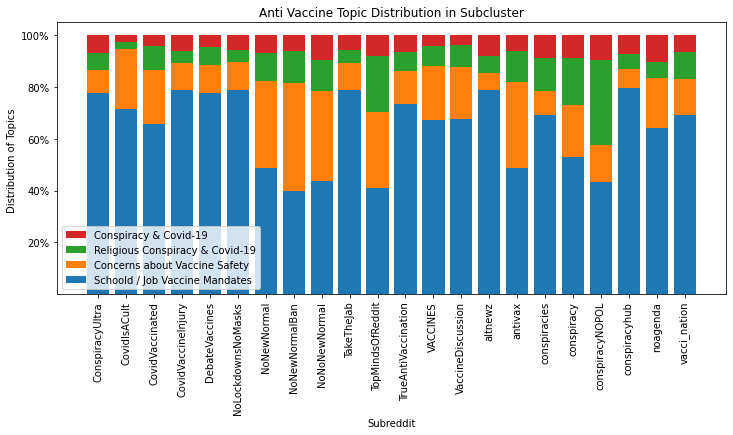

In [125]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 250), "{:,}".format(int(y[i])), ha = 'center', rotation = 0)

subs = a_sr_s.index.values
fig, ax = plt.subplots(figsize = (12, 5))
ax.bar(a_sr_s.index, a_sr_s['topic_0'], label='Schoold / Job Vaccine Mandates')
ax.bar(a_sr_s.index, a_sr_s['topic_1'], bottom=a_sr_s['topic_0'],
       label='Concerns about Vaccine Safety')
ax.bar(a_sr_s.index, a_sr_s['topic_2'], bottom=( a_sr_s['topic_0']+a_sr_s['topic_1']),
       label='Religious Conspiracy & Covid-19')
ax.bar(a_sr_s.index, a_sr_s['topic_3'], bottom=( a_sr_s['topic_0']+a_sr_s['topic_1'] + a_sr_s['topic_2']),
       label='Conspiracy & Covid-19')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
plt.title("Anti Vaccine Topic Distribution in Subcluster")

plt.ylabel("Distribution of Topics ")
plt.yticks(ticks=[0.2, 0.4, 0.6, 0.8, 1], labels=["20%", "40%", "60%", "80%", "100%"])
plt.xlabel("Subreddit")
plt.xticks(rotation=90)
plt.savefig('../../Visualizations/RQ2/A_topics_distr.png', dpi=600, bbox_inches='tight')

# Pro Vax

### Number of Topics

In [18]:
Number= [	2,	3,	4,	5,	6,	7,	8]
LB_LogLikelihood= [	-9113045.799, 	-9128440.805, 	-9158161.695, 	-9167561.315, 	-9189898.327, 	-9206951.822, 	-9202556.697]
UB_Perplexity= [	5.443136324, 	5.452331616, 	5.470083624, 	5.475697928, 	5.489039615, 	5.499225506, 	5.49660034]

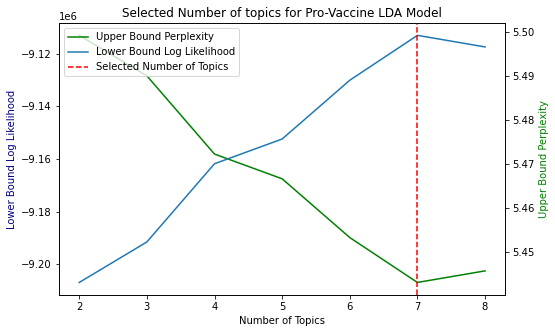

In [21]:
fig, ax = plt.subplots(figsize = (8, 5))
ax1 = ax.twinx()
l1, = ax.plot(Number, LB_LogLikelihood, label='Upper Bound Perplexity ', color='green')
l2, = ax1.plot(Number, UB_Perplexity, label='Lower Bound Log Likelihood')
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Lower Bound Log Likelihood')
ax.yaxis.label.set_color('navy')
ax1.yaxis.label.set_color('green')
ax1.set_ylabel('Upper Bound Perplexity')

l3 = ax1.axvline(x=7, color='red', linestyle='--', label='Selected Number of Topics')
plt.title('Selected Number of topics for Pro-Vaccine LDA Model')
plt.legend(handles=[l1, l2, l3],loc='best')
plt.savefig('../../Visualizations/RQ2/P_num_topics.pdf', dpi=600)

## PyLDAvis

In [79]:
import ast
with open('../../Files/models/topics/p_7_vocab_2.txt', 'r') as file:
    vocab = file.read().splitlines()

with open('../../Files/models/topics/p_7_tf_2.txt', 'r') as file:
    TF = file.read().splitlines()

df = pd.read_pickle('../../Files/models/topics/term_topics_p_7_2.pkl')
df2 = pd.read_pickle('../../Files/models/topics/doctop_p_7_distr_2.pickle')

docLen = pd.read_pickle('../../Files/models/topics/doclen_p_7_2.pkl')
doclen = docLen['doc_len']
df2['len'] = doclen

df2['sum'] = df2[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']].sum(axis=1)
df5 = df2[df2['sum'] == 1]
df3 = df5[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']]
doc_len = df5['len']

In [52]:
topic_term = df.to_numpy()
doc_topic = df3.to_numpy()

In [53]:
topic_term.shape

(7, 5000)

In [62]:
len(vocab)

5000

In [54]:
Pro_top = pyLDAvis.prepare(topic_term, doc_topic,  doc_len,vocab, TF )

/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

In [64]:
pyLDAvis.display(Pro_top)

## Get Topic Descriptions

## Subcluster Differences

In [82]:
p_sr = df2[['subreddit', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']].groupby('subreddit').mean()

In [83]:
p_sr_s = p_sr[p_sr.index.isin(subcluster)]

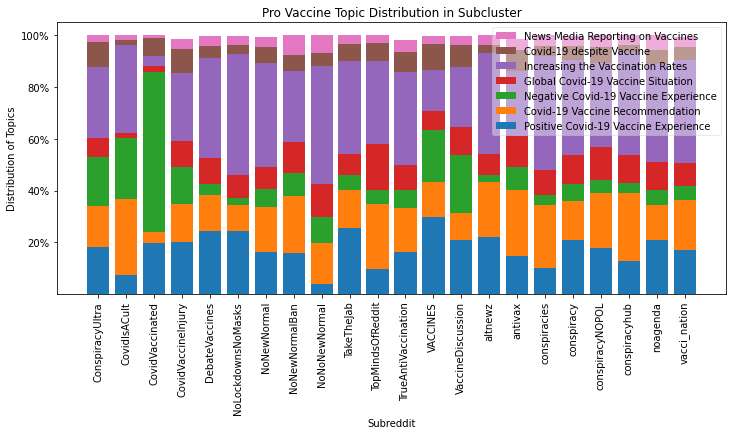

In [124]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 250), "{:,}".format(int(y[i])), ha = 'center', rotation = 0)

subs = p_sr_s.index.values
fig, ax = plt.subplots(figsize = (12, 5))
ax.bar(p_sr_s.index, p_sr_s['topic_0'], label='Positive Covid-19 Vaccine Experience')
ax.bar(p_sr_s.index, p_sr_s['topic_1'], bottom= p_sr_s['topic_0'],
       label='Covid-19 Vaccine Recommendation')
ax.bar(p_sr_s.index, p_sr_s['topic_2'], bottom=( p_sr_s['topic_0'] + p_sr_s['topic_1']),
       label='Negative Covid-19 Vaccine Experience')
ax.bar(p_sr_s.index, p_sr_s['topic_3'], bottom=( p_sr_s['topic_0'] + p_sr_s['topic_1'] + p_sr_s['topic_2']),
       label='Global Covid-19 Vaccine Situation')
ax.bar(p_sr_s.index, p_sr_s['topic_4'], bottom=( p_sr_s['topic_0'] + p_sr_s['topic_1'] + p_sr_s['topic_2'] + p_sr_s['topic_3']),
       label='Increasing the Vaccination Rates')
ax.bar(p_sr_s.index, p_sr_s['topic_5'], bottom=( p_sr_s['topic_0'] + p_sr_s['topic_1'] + p_sr_s['topic_2'] + p_sr_s['topic_3'] + p_sr_s['topic_4']),
       label='Covid-19 despite Vaccine')
ax.bar(p_sr_s.index, p_sr_s['topic_6'], bottom=( p_sr_s['topic_0'] + p_sr_s['topic_1'] + p_sr_s['topic_2'] + p_sr_s['topic_3'] + p_sr_s['topic_4']+ p_sr_s['topic_5']),
       label='News Media Reporting on Vaccines')


plt.title("Pro Vaccine Topic Distribution in Subcluster")


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], framealpha=0.4)
plt.ylabel("Distribution of Topics")
plt.yticks(ticks=[0.2, 0.4, 0.6, 0.8, 1], labels=["20%", "40%", "60%", "80%", "100%"])
plt.xlabel("Subreddit")
plt.xticks(rotation=90)
plt.savefig('../../Visualizations/RQ2/P_topics_distr.png', dpi=600, bbox_inches='tight')

# Neutral

## Number of Topics

In [23]:
Number = 	[2,	3,	4,	5,	6,	7,	8]
LB_LogLikelihood = [	-7809203.831,	-7842201.601,	-7883585.952,	-7916024.304,	-7925429.533,	-7937016.646,	-7932070.884]
UB_Perplexity = [	5.866667942,	5.891457532,	5.922547545,	5.946916871,	5.953982553,	5.962687378,	5.958971872]

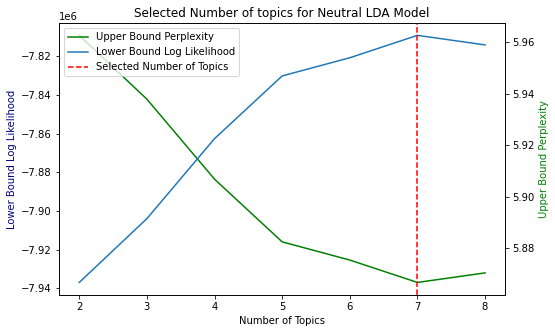

In [24]:
fig, ax = plt.subplots(figsize = (8, 5))
ax1 = ax.twinx()
l1, = ax.plot(Number, LB_LogLikelihood, label='Upper Bound Perplexity', color='green')
l2, = ax1.plot(Number, UB_Perplexity, label='Lower Bound Log Likelihood')
ax.set_xlabel('Number of Topics')
ax.set_ylabel('Lower Bound Log Likelihood')
ax.yaxis.label.set_color('navy')
ax1.yaxis.label.set_color('green')
ax1.set_ylabel('Upper Bound Perplexity')

l3 = ax1.axvline(x=7, color='red', linestyle='--', label='Selected Number of Topics')
plt.title('Selected Number of topics for Neutral LDA Model')
plt.legend(handles=[l1, l2, l3],loc='best')
plt.savefig('../../Visualizations/RQ2/N_num_topics.pdf', dpi=600)

## PyLDAvis

In [90]:
import ast
with open('../../Files/models/topics/n_7_vocab_2.txt', 'r') as file:
    vocab = file.read().splitlines()

with open('../../Files/models/topics/n_7_tf_2.txt', 'r') as file:
    TF = file.read().splitlines()

df = pd.read_pickle('../../Files/models/topics/term_topics_n_7_2.pkl')
df2 = pd.read_pickle('../../Files/models/topics/doctop_n_7_distr_2.pickle')

docLen = pd.read_pickle('../../Files/models/topics/doclen_n_7_2.pkl')
doclen = docLen['doc_len']
df2['len'] = doclen

df2['sum'] = df2[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']].sum(axis=1)
df5 = df2[df2['sum'] == 1]
df3 = df5[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']]
doc_len = df5['len']

In [56]:
topic_term = df.to_numpy()
doc_topic = df3.to_numpy()

In [77]:
print(topic_term.shape, doc_topic.shape)

(7, 5000) (281273, 7)


In [78]:
len(vocab)

5000

In [57]:
Neut_top = pyLDAvis.prepare(topic_term, doc_topic,  doc_len,vocab, TF )

/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/jakobschlierf/opt/anaconda3/envs/reddit_env_test/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; se

In [58]:
pyLDAvis.display(Neut_top)

In [91]:
n_sr = df2[['subreddit', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6']].groupby('subreddit').mean()

In [92]:
n_sr_s = n_sr[n_sr.index.isin(subcluster)]

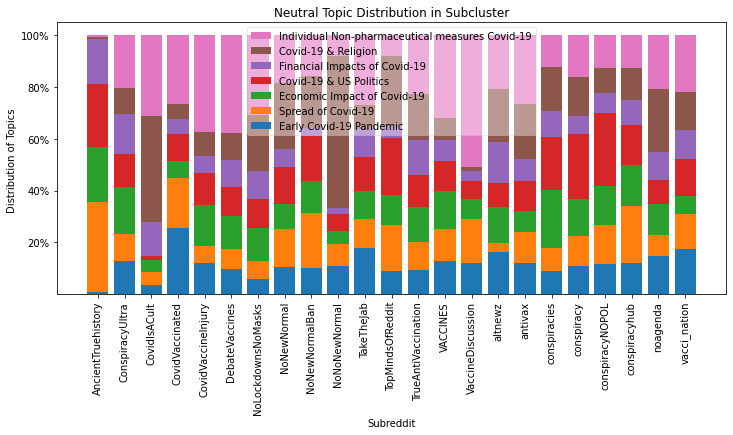

In [98]:
def addlabels(x,y,offset=0):
    for i in range(len(x)):
        plt.text((i+ offset), (y[i] + 250), "{:,}".format(int(y[i])), ha = 'center', rotation = 0)

subs = n_sr_s.index.values
fig, ax = plt.subplots(figsize = (12, 5))
ax.bar(n_sr_s.index, n_sr_s['topic_0'], label='Early Covid-19 Pandemic')
ax.bar(n_sr_s.index, n_sr_s['topic_1'], bottom= n_sr_s['topic_0'],
       label='Spread of Covid-19')
ax.bar(n_sr_s.index, n_sr_s['topic_2'], bottom=( n_sr_s['topic_0'] + n_sr_s['topic_1']),
       label='Economic Impact of Covid-19')
ax.bar(n_sr_s.index, n_sr_s['topic_3'], bottom=( n_sr_s['topic_0'] + n_sr_s['topic_1'] + n_sr_s['topic_2']),
       label='Covid-19 & US Politics')
ax.bar(n_sr_s.index, n_sr_s['topic_4'], bottom=( n_sr_s['topic_0'] + n_sr_s['topic_1'] + n_sr_s['topic_2'] + n_sr_s['topic_3']),
       label='Financial Impacts of Covid-19')
ax.bar(n_sr_s.index, n_sr_s['topic_5'], bottom=( n_sr_s['topic_0'] + n_sr_s['topic_1'] + n_sr_s['topic_2'] + n_sr_s['topic_3'] + n_sr_s['topic_4']),
       label='Covid-19 & Religion')
ax.bar(n_sr_s.index, n_sr_s['topic_6'], bottom=( n_sr_s['topic_0'] + n_sr_s['topic_1'] + n_sr_s['topic_2'] + n_sr_s['topic_3'] + n_sr_s['topic_4']+ n_sr_s['topic_5']),
       label='Individual Non-pharmaceutical measures Covid-19')


plt.title("Neutral Topic Distribution in Subcluster")


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], framealpha=0.4)
plt.ylabel("Distribution of Topics ")
plt.yticks(ticks=[0.2, 0.4, 0.6, 0.8, 1], labels=["20%", "40%", "60%", "80%", "100%"])
plt.xlabel("Subreddit")
plt.xticks(rotation=90)
# plt.tight_layout()
plt.savefig('../../Visualizations/RQ2/N_topics_distr.png', dpi=600, bbox_inches='tight')

In [120]:
NNNN = pd.read_pickle('../../Files/Submissions/score/done/d_NoNoNewNormal.pickle')

In [121]:
NNNN_p = NNNN[NNNN['class_II'] == 2]
NNNN_p.reset_index(inplace=True)

In [122]:
for i in range(25, 50):
    print(NNNN_p.loc[i,'text'])

Thousands of anti-vaccine protesters gather in London 
France drops a big fat "fascist" boot down on anti-vaxxer plague rats. Vive la France! 
Covid: Anti-vax protesters intimidate teen outside jab centre 
More anti-vax drivel at the Truro, Cornwall bus stop 
Yes, we're all "playing" pandemic - post from a community COVIDIOT in my comments about anti-vax fly posting 
World War Covid has started: President Biden announces sweeping new vaccine mandates impacting 100 million workers 
France, Spain, Denmark, and The Netherlands all ban unvaccinated US travelers. The war on covidiots is spreading! Allies vs Axis Part II 
Qantas says it will ban unvaccinated travelers from international flights. The noose gets tighter! 
Heavy flyposting by anti-vax group(s) at the Truro community bus stop 
Howard Stern to anti-vaxxers: ‘F— their freedom, I want my freedom to live’ 
'Appalling' anti-vaxxers 'invade' school and film children 
My personal favourite 
Great news. 
Excellent! 
Yes. 


KeyError: 40